## Деревья решений

In [2]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Загрузка базы данных "Ирисы Фишера" 


In [3]:
# загрузка базы
# data - словарь
iris = load_iris()

# Описание базы
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# для того, чтобы загрузить X и y
X,y = iris.data, iris.target 
# или X,y =load_iris(return_X_y=True) 

### Разделим на тренировочную выборку и тест

В scikit-learn для этого есть функция train_test_split

In [5]:
(X_train, X_test, 
 y_train, y_test) = train_test_split(X,y, test_size=0.3, 
                                     random_state=43)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


### Создадим и обучим классификатор

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

# обучаем
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
clf.feature_importances_

array([ 0.00715064,  0.01430128,  0.58587578,  0.3926723 ])

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  


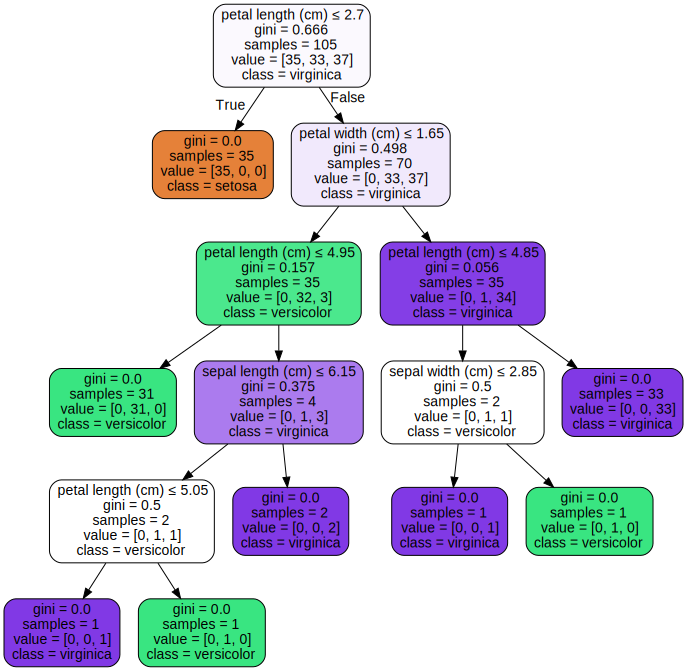

In [9]:
graph = graphviz.Source(dot_data)  
graph 

### Проверим эффективность на тестовой выборке

In [10]:
# эффективность классификации
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Эффективность составила: {:.4}'.format(accuracy*100))

Эффективность составила: 93.33


### Визуализация decision boundary для классификаторов с разными ядрами

#### Вспомогательные функции для визуализации

In [11]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

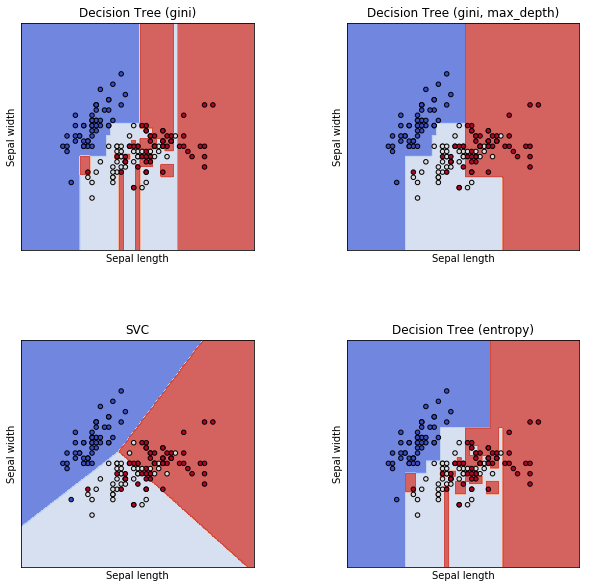

In [12]:
# Берем только первые два признака (это нужно для визуализации)
X_sub = iris.data[:, :2]

# Создаем несколько экземпляров SVM с разными ядрами
# линейное, радиално-базисное, полиномиальное
C = 10.0  # SVM параметр регуляризации
models = (tree.DecisionTreeClassifier(criterion='gini'),
          tree.DecisionTreeClassifier(criterion='gini',max_depth=4),
          svm.LinearSVC(C=C),
          tree.DecisionTreeClassifier(criterion='entropy'))

# обучаем все четыре модели
models = (clf.fit(X_sub, y) for clf in models)

# названия для графиков
titles = ('Decision Tree (gini)',
          'Decision Tree (gini, max_depth)',
          'SVC',
          'Decision Tree (entropy)')

# создаем 2x2 сетку для визуализации
fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# создаем все возможные комбинации двух
# параметров
X0, X1 = X_sub[:, 0], X_sub[:, 1]
xx, yy = make_meshgrid(X0, X1)

# строим графики
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Пример с Титаником

In [13]:
import pandas as pd

dataset = pd.read_csv('titanic.csv', index_col='PassengerId')
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
dataset = dataset[['Fare', 'Pclass', 'Age', 'Sex', 'Survived']]
mapping = {'male': 1, 'female': 0}
dataset = dataset.replace({'Sex': mapping})
mean_age = dataset['Age'].mean()
dataset['Age'] = dataset['Age'].fillna(mean_age)
import numpy as np
X = np.array( dataset[['Fare', 'Pclass', 'Age', 'Sex']] )
y = np.array( dataset[['Survived']] )[:,0]

In [15]:
X.shape

xx = X[:,1:3]
xx.shape

(891, 2)

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

# обучаем
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=dataset.columns.values[0:-1],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("titanic.pdf") 
# graph 

'titanic.pdf'

# MNIST

In [18]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

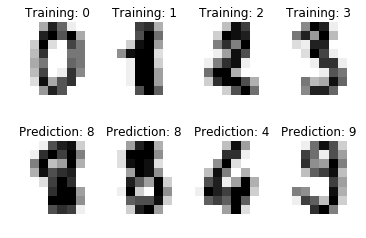

In [19]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Ансамбли алгоритмов 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.datasets import make_classification

In [24]:
clf_gd = GradientBoostingClassifier(n_estimators=10, learning_rate=0.2, verbose=True, random_state=241)
print(data.shape, digits.target.shape)
clf_gd.fit(data, digits.target)

(1797, 64) (1797,)
      Iter       Train Loss   Remaining Time 
         1        2225.0739            0.41s
         2        1663.2235            0.35s
         3        1312.2311            0.30s
         4        1046.4519            0.25s
         5         841.4164            0.21s
         6         683.7968            0.17s
         7         562.6106            0.13s
         8         468.6438            0.08s
         9         389.7402            0.04s
        10         326.0524            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=241, subsample=1.0,
              verbose=True, warm_start=False)

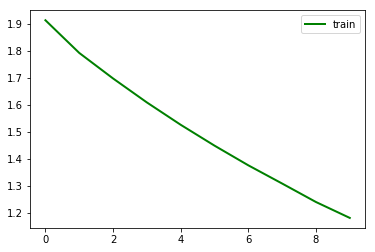

In [25]:
from sklearn.metrics import log_loss

staged  = clf_gd.staged_decision_function(data)
log_loss_train = []
for y_pred in staged:
    log_loss_train += [log_loss(digits.target, 1.0/(1.0 + np.exp(-y_pred)))]
    
plt.figure()
# plt.plot(log_loss_test, 'r', linewidth=2)
plt.plot(log_loss_train, 'g', linewidth=2)
plt.legend([ 'train'])

# KFold

In [26]:
X_raw = data
from sklearn.model_selection import KFold

In [39]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [82]:
# Grid search

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,0.9, 1, 1.1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

# GridSearchCV(cv=None,
#        estimator=svm.SVC(C=1.0, kernel='rbf', verbose=False),
#        fit_params=None, n_jobs=1,
#             )

print(sorted(clf.cv_results_.keys()))
clf.best_estimator_
clf.cv_results_

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']


d:\dev\envs\dl\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
d:\dev\envs\dl\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
d:\dev\envs\dl\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
d:\dev\envs\dl\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You a

{'mean_fit_time': array([ 0.00068553,  0.00133761,  0.00033402,  0.00033347,  0.00033434,
         0.0006663 ,  0.00133562,  0.00033418,  0.00065923,  0.00134254]),
 'mean_score_time': array([ 0.00066996,  0.00066789,  0.00066972,  0.00067806,  0.00033283,
         0.00067163,  0.        ,  0.00065613,  0.00034714,  0.00065509]),
 'mean_test_score': array([ 0.96      ,  0.95333333,  0.98      ,  0.97333333,  0.98      ,
         0.97333333,  0.98666667,  0.97333333,  0.97333333,  0.98      ]),
 'mean_train_score': array([ 0.96682511,  0.94355318,  0.98673005,  0.98009507,  0.98999802,
         0.98336304,  0.98999802,  0.98336304,  0.97999604,  0.97999604]),
 'param_C': masked_array(data = [0.1 0.1 0.9 0.9 1 1 1.1 1.1 10 10],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'rbf' 'linear' 'rbf' 'linear' 'rbf' 'linear' 'rbf' 'linear' 'rbf'],
              mask = [False False False 